# Example script

Example script to show how to use the proposed MRF reconstruction.

In [1]:
import h5py

from MRFrecon import MrfData

## Load data
First download the data from location as specified in ``example_data/readme.txt``.

### Load data from numerical phantom

In [ ]:
with h5py.File(r'example_data/num_phantom.h5', 'r') as hf:
    print(hf.keys())
    ksp = hf.get('kspace')[:]
    coord = hf.get('coord')[:]

# Load dictionary
with h5py.File(r'example_data/dictionary.h5', 'r') as hf:
    dictmat = hf.get('dictmat')[:].T.imag
    dictt1 = hf.get('t1list')[:]
    dictt2 = hf.get('t2list')[:]

### Create the data class

In [26]:
data = MrfData()
data.ksp = ksp
data.coord = coord
data.dictmat = dictmat
data.dictt1 = dictt1
data.dictt2 = dictt2

In [27]:
# equivalent to:
# data = MrfData(ksp, coord, dictmat, dictt1, dictt2)

In [28]:
# make 2 copies
data2 = data.copy()
data3 = data.copy()

# Solve LR inversion with single component matching

In [6]:
# very similar to (slightly different settings)
#       recon_lr_invert(data, settings=load_settings('./example_data/config.ini',0))

In [7]:
# compress dictionary to rank 10
data.compress_dictionary(10)

In [8]:
# Set the compute device, 0 is a GPU
compute_device = 0

In [9]:
# Espirit calc for sensitivity maps, with reconstruction matrix of size 256x256
data.mrf_espirit(256, compute_device=compute_device, tol_fac=.005, )

Espirit Calibration


LinearLeastSquares:   0%|          | 0/50 [00:00<?, ?it/s]

EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
# compress data to 5 virtual coils
data.coil_compression(5)

In [11]:
# Low rank inversion image reconstruction
data.lr_inversion(compute_device=compute_device, tol_fac=.005, )

imgseq by Low rank Inversion


LinearLeastSquares:   0%|          | 0/150 [00:00<?, ?it/s]

In [12]:
# rotate image sequence to real axis
data.rotate2real()

Single component matching


Matching: 100%|█████████████████████████████████| 66/66 [00:09<00:00,  7.27it/s]


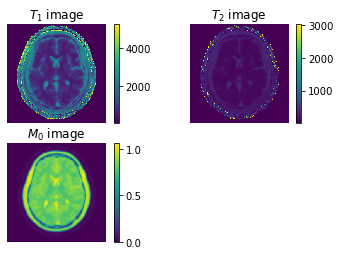

max T1 value
5203.951312018474
max T2 value
3014.0329179760565


In [13]:
# Solve for single component MRF
data.single_component_match(verbose=2) # Verbose is 2 creates plots

In [14]:
# Save to .h5
data.to_h5('./example_data/', 'lr_inv_single.h5')

fixed_b1 could not be compressed while saving


# Solve LR ADMM with SPIJN component reconstruction

In [15]:
# very similar to (slightly different settings)
# recon_admm_into_spijn(data, settings=load_settings('./example_data/config.ini',2))

In [29]:
# compress dictionary to rank 10
data2.compress_dictionary(10)

In [30]:
# Espirit calc for sensitivity maps, with reconstruction matrix of size 256
data2.mrf_espirit(256, compute_device=compute_device)

Espirit Calibration


LinearLeastSquares:   0%|          | 0/50 [00:00<?, ?it/s]

EspiritCalib:   0%|          | 0/100 [00:00<?, ?it/s]

In [31]:
# compress data to 5 virtual coils
data2.coil_compression(5)

In [32]:
reg_kwargs= {'regtype': 'wavelet_sc', 'lam': 1e-6,
           'lambda_ksp': True}

In [33]:
2

2

In [ ]:
# Low rank admm image reconstruction
data2.lr_admm(2e-3, compute_device=compute_device, n_jobs=4, max_iter=5, max_cg_iter=50,
              tol_fac=0.005, lstsq_solver = 'PrimalDualHybridGradient')
# Note: low rank admm does not need rotate2real()!

Outer loop iteration 1 of 5
imgseq by Low rank Inversion


MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

LinearLeastSquares:   0%|          | 0/50 [00:00<?, ?it/s]

NNLS solve
number of cores 4
Objective function value: |GFSDc-y| = 0.14616721389780934
Obj_val, |GFSx-y| = 0.11851845246552842
Objective function value: |x-Dc| = 2.5916017988795197
Objective function value: |GFSx-y| + mu2|x-Dc+v| = 0.02760819023191002
Outer loop iteration 2 of 5
imgseq by Low rank Inversion


MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

LinearLeastSquares:   0%|          | 0/50 [00:00<?, ?it/s]

NNLS solve
number of cores 4
Iteration: 1, nnls convergence:0.15389878699046203
Objective function value: |GFSDc-y| = 0.08041014197231923
Obj_val, |GFSx-y| = 0.055808138807072825
Objective function value: |x-Dc| = 2.547576606935179
Objective function value: |GFSx-y| + mu2|x-Dc+v| = 0.01650217675730181
Convergence rate = 0.08838459214595053
Outer loop iteration 3 of 5
imgseq by Low rank Inversion


MaxEig:   0%|          | 0/30 [00:00<?, ?it/s]

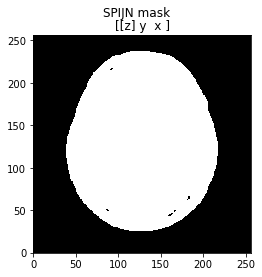

Start SPIJN solve
number of cores 1
matching time: 181.37277s
number of cores 1
matching time: 26.53647s
k: 1 relative difference between iterations 1.252914110433967,elements: 6
Pruned percentage 99.91437134294277,rest:6.
number of cores 1
matching time: 0.52197s
k: 2 relative difference between iterations 0.6962405763168172,elements: 4
number of cores 1
matching time: 0.53079s
k: 3 relative difference between iterations 0.018997690106753288,elements: 3
number of cores 1
matching time: 0.50124s
k: 4 relative difference between iterations 0.0065366441222057155,elements: 3
number of cores 1
matching time: 0.55980s
k: 5 relative difference between iterations 0.003811306149214446,elements: 3
number of cores 1
matching time: 0.52787s
k: 6 relative difference between iterations 0.0021593502732707315,elements: 3
number of cores 1
matching time: 0.56678s
k: 7 relative difference between iterations 0.0012156668650376739,elements: 3
number of cores 1
matching time: 0.56082s
k: 8 relative differ

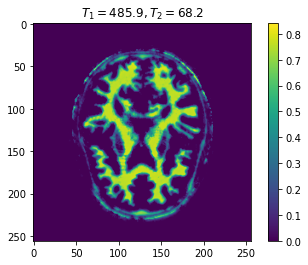

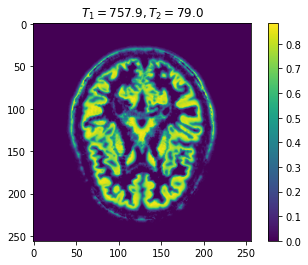

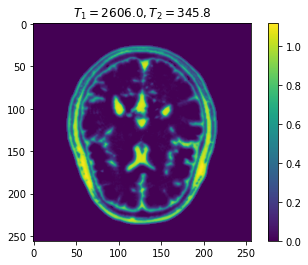

In [35]:
# Solve for components with a joint sparse regularization parameter of 0.25
data2.spijn_solve(0.25, verbose=2, n_jobs=4)

In [ ]:
# Save to .h5
data2.to_h5('./example_data/', 'lr_admm_spijn.h5')

# k-SPIJN direct MC-MRF reconstruction

In [ ]:
# very similar to (slightly different settings)
# recon_admm_into_spijn(data, settings=load_settings('./example_data/config.ini',1))

In [ ]:
# compress dictionary to rank 10
data3.compress_dictionary(10)

In [ ]:
# Espirit calc for sensitivity maps, with reconstruction matrix of size 256
data3.mrf_espirit(256, compute_device=compute_device)

In [ ]:
# compress data to 5 virtual coils
data3.coil_compression(5)

In [ ]:
# Direct component reconstruction
data3.spijn_from_ksp(admm_param=2e-3, reg_param=0.25,
                     compute_device=compute_device, verbose=2, n_jobs=1, tol_fac=.05)

In [ ]:
# Save to .h5
data3.to_h5('./example_data/', 'direct.h5')